In [1]:
!pip install nltk scikit-learn pandas matplotlib seaborn


In [6]:
import pandas as pd

# Replace 'path_to_file.csv' with your dataset file path
data = pd.read_csv('train.csv', encoding='latin-1')
data.head()


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Download the required NLTK data package
nltk.download('punkt_tab') # Download the 'punkt_tab' data for sentence tokenization
nltk.download('stopwords')
nltk.download('punkt')

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenize text
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(tokens)

data['cleaned_text'] = data['text'].apply(clean_text) # Apply the clean_text function to the 'text' column

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


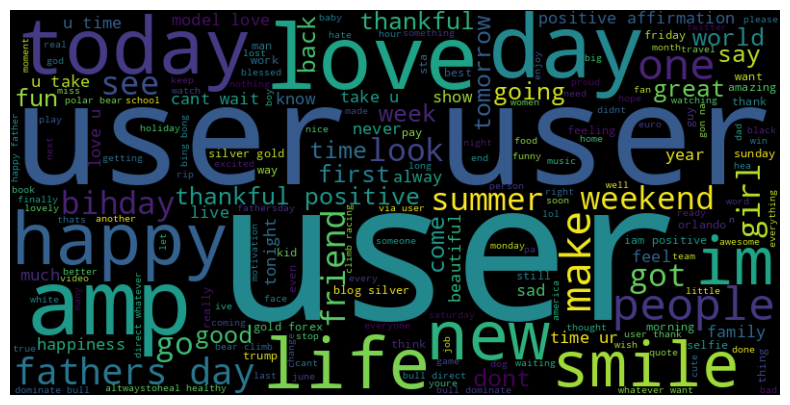

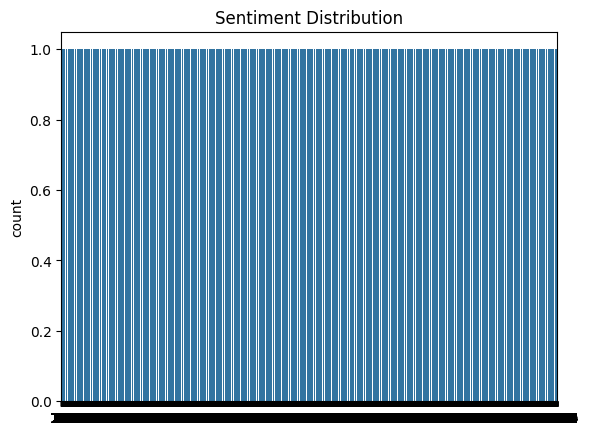

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Word Cloud for visualization
text = ' '.join(data['cleaned_text'])
wordcloud = WordCloud(width=800, height=400).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Sentiment distribution
# Assuming 'label' column contains sentiment information, change 'sentiment' to 'label'
sns.countplot(data['label'])
plt.title('Sentiment Distribution')
plt.show()


In [13]:
from sklearn.model_selection import train_test_split

X = data['cleaned_text']
y = data['label']  # Ensure this column is binary or categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5937
           1       0.92      0.34      0.49       456

    accuracy                           0.95      6393
   macro avg       0.93      0.67      0.73      6393
weighted avg       0.95      0.95      0.94      6393

Accuracy: 0.9505709369623025


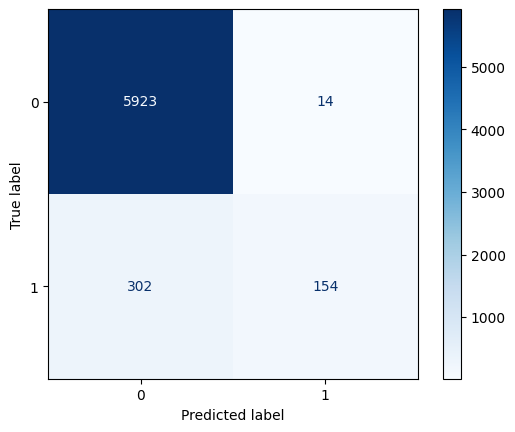

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.show()
